# Welcome to Colab! 🤖

Google Colaboratory, or Colab for short, is a browser-based notebook that can be used to train, test and share your machine learning models.

In this introductory document we've listed the basics for interacting with a Colab notebook and some of the things you can do with it. We recommend using Google Chrome, Firefox or Brave to run this, Safari has some unexpected issues...


# Cells ⭐

Cells are the building blocks of a colab document, and can contain code, text, images and more! Press the play button on the cell to run it

In [ ]:
print ("Welcome to Colab! 👋")

Welcome to Colab! 👋


Cells can be as simple as running a single command, and as complex as spinning up an application inside of them. Here's one example where we create a webcam with a button to capture images and save them as files to your Google Drive.

In [ ]:
#@title Smile, You're on Camera 📸 { vertical-output: true, display-mode: "form" }

# 
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

# Working with files 📁

Speaking of files, Colab lets us upload them from our local system, work with ones saved in our Google Drive or to grab them from Github

In [ ]:
#@title Local Files { vertical-output: true, display-mode: "form" }

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#@title Drive Files { vertical-output: true, display-mode: "form" }

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


## Github repositories:

We can interact with Github in a few ways in Colab. We can create a new document by pasting a URL, cloning a repo in the noteboo

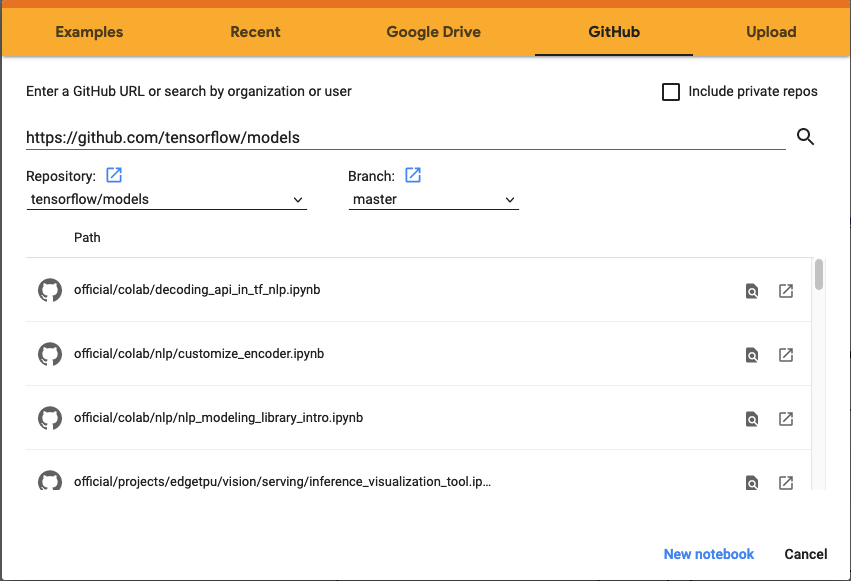


1.   Clone an entire repo


```
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls
```

2. Clone a specific file (<1MB)

```
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv

```



This comes in handy when we want to import a model into our notebook to work with. Here we're going to import a pre-trained Tensorflow model that we created using Teachable Machine.

In [ ]:
import tensortflow as tf 

## Load models from Google Drive
models_path = '/content/gdrive/My Drive/TeachableMachine/models'
data_path = 

In [ ]:
#@title Utility function to show progress bar.
from tqdm import tqdm

# MNIST training set has 60k images.
num_images = 60000

def progress_bar(generator):
  return tqdm(
      generator,
      unit='images',
      unit_scale=batch_size,
      total=(num_images // batch_size) * num_epochs)
